In [1]:
using Plots
using JLD2
using LaTeXStrings
using StatsBase

In [2]:
saved_data = jldopen("../data/25_07_22.jld2")["data"]

Dict{Tuple{Int64, Int64, Float64, Float64, Float64}, Tuple{Int64, Dict}} with 33 entries:
  (8, 16, 0.6, 0.7, 0.1)  => (250, Dict(:κEA=>[8.0, 8.0, 1.06778, 1.57057, 1.00…
  (12, 24, 0.0, 0.7, 0.1) => (250, Dict(:κEA=>[12.0, 12.0, 2.84549, 9.76532, 2.…
  (8, 16, 0.1, 0.7, 0.1)  => (250, Dict(:κEA=>[8.0, 8.0, 2.08585, 5.74068, 1.73…
  (12, 24, 0.3, 0.7, 0.1) => (250, Dict(:κEA=>[12.0, 12.0, 1.91091, 6.15861, 1.…
  (4, 8, 0.4, 0.7, 0.1)   => (250, Dict(:κEA=>[4.0, 4.0, 1.1432, 2.13562, 1.056…
  (8, 16, 1.0, 0.7, 0.1)  => (250, Dict(:κEA=>[8.0, 8.0, 1.00022, 1.00022, 1.00…
  (4, 8, 0.6, 0.7, 0.1)   => (250, Dict(:κEA=>[4.0, 4.0, 1.02905, 1.37289, 1.00…
  (4, 8, 0.1, 0.7, 0.1)   => (250, Dict(:κEA=>[4.0, 4.0, 1.46536, 3.11431, 1.32…
  (8, 16, 0.2, 0.7, 0.1)  => (250, Dict(:κEA=>[8.0, 8.0, 1.85823, 5.36032, 1.53…
  (8, 16, 0.7, 0.7, 0.1)  => (250, Dict(:κEA=>[8.0, 8.0, 1.02335, 1.20661, 1.00…
  (8, 16, 0.8, 0.7, 0.1)  => (250, Dict(:κEA=>[8.0, 8.0, 1.00653, 1.04817, 1.00…
  (12, 24, 0.9, 0.7

In [74]:
newer_data = jldopen("../output/collated_results.jld2")["results"]

Dict{NTuple{5, Any}, Tuple{Dict{Symbol, Vector{Float64}}, Dict{Symbol, Vector{Float64}}, Int64, Vector{Symbol}, Float64}} with 66 entries:
  (24, 50, 0.8, 0.7, 0.1) => (Dict(:κEA=>[24.0, 24.0, 24.0, 1.02145, 1.09126, 1…
  (2, 6, 1.0, 0.7, 0.1)   => (Dict(:κEA=>[2.0, 2.0, 2.0, 1.00003, 1.00003, 1.0,…
  (16, 34, 0.7, 0.7, 0.1) => (Dict(:κEA=>[16.0, 16.0, 16.0, 1.05003, 1.3426, 1.…
  (16, 34, 0.5, 0.7, 0.1) => (Dict(:κEA=>[16.0, 16.0, 16.0, 1.35099, 3.52221, 1…
  (2, 6, 0.2, 0.7, 0.1)   => (Dict(:κEA=>[2.0, 2.0, 2.0, 1.1226, 1.84937, 1.121…
  (2, 6, 0.7, 0.7, 0.1)   => (Dict(:κEA=>[2.0, 2.0, 2.0, 1.00334, 1.11787, 1.00…
  (16, 34, 0.3, 0.7, 0.1) => (Dict(:κEA=>[16.0, 16.0, 16.0, 2.24215, 7.96119, 1…
  (24, 50, 0.0, 0.7, 0.1) => (Dict(:κEA=>[24.0, 24.0, 24.0, 4.85876, 19.979, 4.…
  (2, 6, 0.5, 0.7, 0.1)   => (Dict(:κEA=>[2.0, 2.0, 2.0, 1.0234, 1.00894, 1.000…
  (32, 66, 0.1, 0.7, 0.1) => (Dict(:κEA=>[32.0, 32.0, 32.0, 5.80875, 23.8895, 4…
  (32, 66, 1.0, 0.7, 0.1) => (Dict(:κEA=>[32.0, 32.

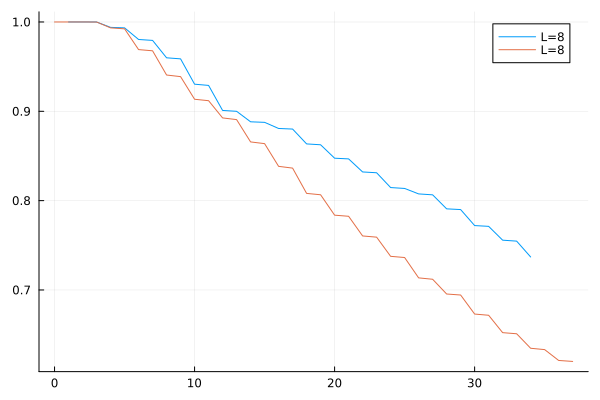

In [77]:
λ = 0.0
δ = 0.7
q = 0.1

plt = plot()

for L in [8]
    xs = collect(1:4L+2)
    ys = saved_data[(L,2L,λ,δ,q)][2][:Ic]
    plot!(plt, xs, ys, label="L=$L")
end


λ = 0.0
δ = 0.7
q = 0.1


for L in [8]
    xs = collect(0:4L+5)
    ys = newer_data[(L,2L+2,λ,δ,q)][2][:Ic]
    plot!(plt, xs, ys, label="L=$L")
end
plt

In [3]:
blur(xs, step) = mean([xs[i:step:end] for i in 1:step])

blur (generic function with 1 method)

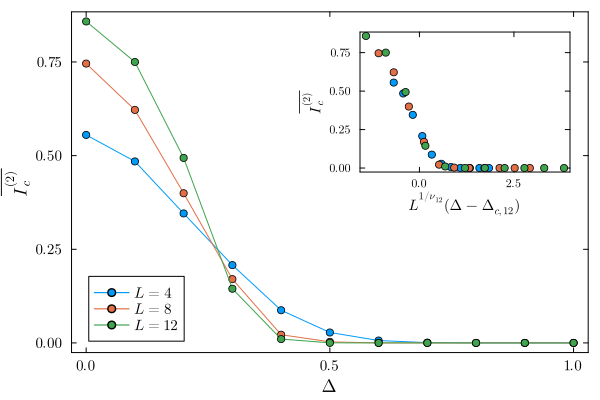

In [5]:
q = 0.1
δ = 0.7
plt = plot()
for L in 4:4:12
    Δs = 0.0:0.1:1.0
    ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:Ic],2)[end] for Δ in Δs]
    xticks = (-1.0:0.5:1.0, [L"-1.0", L"-0.5", L"0.0", L"0.5", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, Δs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\Delta", ylabel=L"\overline{I_c^{(2)}}", # title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, legend=:bottomleft,
    grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
p1 = plt
p1

plot(p1)

plot!(p1,inset=bbox(0.6,0.08,0.35,0.35), subplot=2, )

ν = 1.5
Δc = 0.27
for L in 4:4:12
    Δs = 0.0:0.1:1.0
    xs = (Δs .- Δc) * L^(1/ν)
    ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:Ic],2)[end] for Δ in Δs]
#     # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:2.5:7.5, [L"0.0", L"2.5", L"5.0", L"7.5"])
    yticks = (0.0:0.25:0.75, [L"0.00", L"0.25", L"0.50", L"0.75"])#, L"1.00"])
    plot!(plt, xs, ys, seriestype=:scatter, m=4, label=L"L=%$L", xlabel=L"L^{1/\nu_{12}}(\Delta-\Delta_{c,12})", ylabel=L"\overline{I_c^{(2)}}", # title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks,
    subplot=2, grid=false, legend=false,
    xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
end
# # annotate!(11.5, 0.9, text(L"(\nu_2=1.0)", 10, :center), subplot=2)
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/Ic_2.pdf")
p1

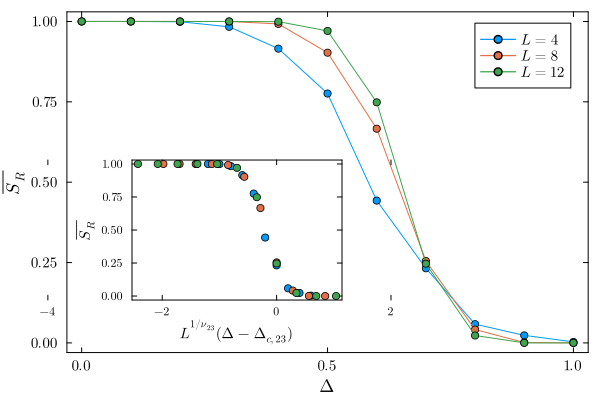

In [14]:
q = 0.1
δ = 0.7
plt = plot()
for L in 4:4:12
    Δs = 0.0:0.1:1.0
    ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:SR],2)[end] for Δ in Δs]
    xticks = (-1.0:0.5:1.0, [L"-1.0", L"-0.5", L"0.0", L"0.5", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, Δs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\Delta", ylabel=L"\overline{S_R}", # title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, legend=:topright,
    grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
p1 = plt
p1

plot(p1)

plot!(p1,inset=bbox(0.22,0.4,0.35,0.35), subplot=2, )

ν = 2.
Δc = 0.7
for L in 4:4:12
    Δs = 0.0:0.1:1.0
    xs = (Δs .- Δc) * L^(1/ν)
    ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:SR],2)[end] for Δ in Δs]
#     # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (-4:2:2, [L"-4", L"-2", L"0", L"2"])
    yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, xs, ys, seriestype=:scatter, m=4, label=L"L=%$L", xlabel=L"L^{1/\nu_{23}}(\Delta-\Delta_{c,23})", ylabel=L"\overline{S_R}", # title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks,
    subplot=2, grid=false, legend=false,
    xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
end
# # annotate!(11.5, 0.9, text(L"(\nu_2=1.0)", 10, :center), subplot=2)
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/SR.pdf")
p1

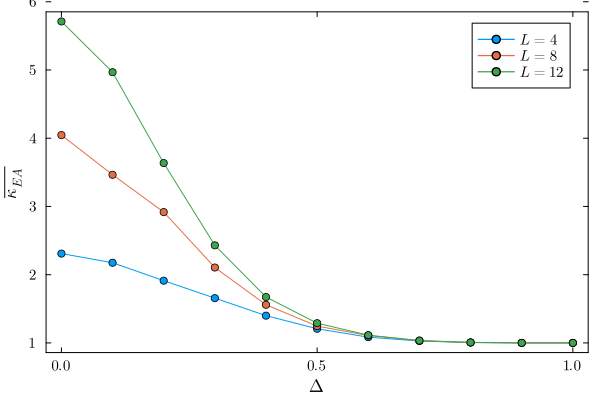

In [22]:

q = 0.1
plt = plot()
for L in 4:4:12
    Δs = 0.0:0.1:1.0
    ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:κEA],2)[end] for Δ in Δs]
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (-1.0:0.5:1.0, [L"-1.0", L"-0.5", L"0.0", L"0.5", L"1.0"])
    yticks = (1:1:6, [L"1", L"2", L"3", L"4", L"5", L"6"])
    plot!(plt, Δs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\Delta", ylabel=L"\overline{\kappa_{EA}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

In [42]:
using ITensors, ITensorMPS, LinearAlgebra
include("../src/states.jl")

to_matrix (generic function with 1 method)

In [66]:
PauliZ = [1 0; 0 -1]
PauliX = [0 1; 1 0]

L  =4

p = 0.5

M = PauliX
ψ, sites = ghz(L)

M_width = 1
pos = 2

legs1 = [sites[mod1(2*(pos+i)-1,2L)] for i in 0:M_width-1]
legs2 = [sites[mod1(2*(pos+i),2L)] for i in 0:M_width-1]

g = p*op(I, legs1...)*op(I, legs2...) + (1-p)*op(M, legs1...)*op(M, legs2...)

ITensor ord=4 (dim=2|id=709|"Qubit,Site,n=3")' (dim=2|id=709|"Qubit,Site,n=3") (dim=2|id=574|"Qubit,Site,n=4")' (dim=2|id=574|"Qubit,Site,n=4")
NDTensors.Dense{Float64, Vector{Float64}}

In [62]:
dense(g)[1,4]

0.5

In [ ]:
function decoherence_layer(sites::Vector{Index{Int}}, M::AbstractMatrix, p::Float64, positions::AbstractVector, L::Int)
    K = atanh(p/(1-p))
    M_width = Int(log2(size(M)[1]))

    gates = ITensor[]
    for pos in positions
        # println([mod1(2*(pos+i)-1,2L) for i in 0:M_width-1])
        # println([mod1(2*(pos+i),2L) for i in 0:M_width-1])
        legs1 = [sites[mod1(2*(pos+i)-1,2L)] for i in 0:M_width-1]
        legs2 = [sites[mod1(2*(pos+i),2L)] for i in 0:M_width-1]
        h = op(M, legs1...)*op(M, legs2...)
        push!(gates, exp(K * h))
    end
    return gates
end